# Prepare environment

In [1]:
import torch
from matplotlib import pyplot as plt


from torch.utils.data import DataLoader

from dataset.STARCOP_dataset import STARCOPDataset
from dataset.dataset_info import ClassifierDatasetInfo
from dataset.dataset_type import DatasetType
from models.Tools.FilesHandler.model_files_handler import ModelFilesHandler
import  os
os.chdir(r"C:\Users\mpilc\Desktop\Studia\Thesis\Repozytoria\Thesis")
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load sample images

In [3]:
dataset = STARCOPDataset(
    data_path=r"data",
    data_type=DatasetType.TEST,
    image_info_class=ClassifierDatasetInfo,
    normalization=False
)

dataloader = DataLoader(dataset, batch_size=6, shuffle=True)

# Visualize inputs

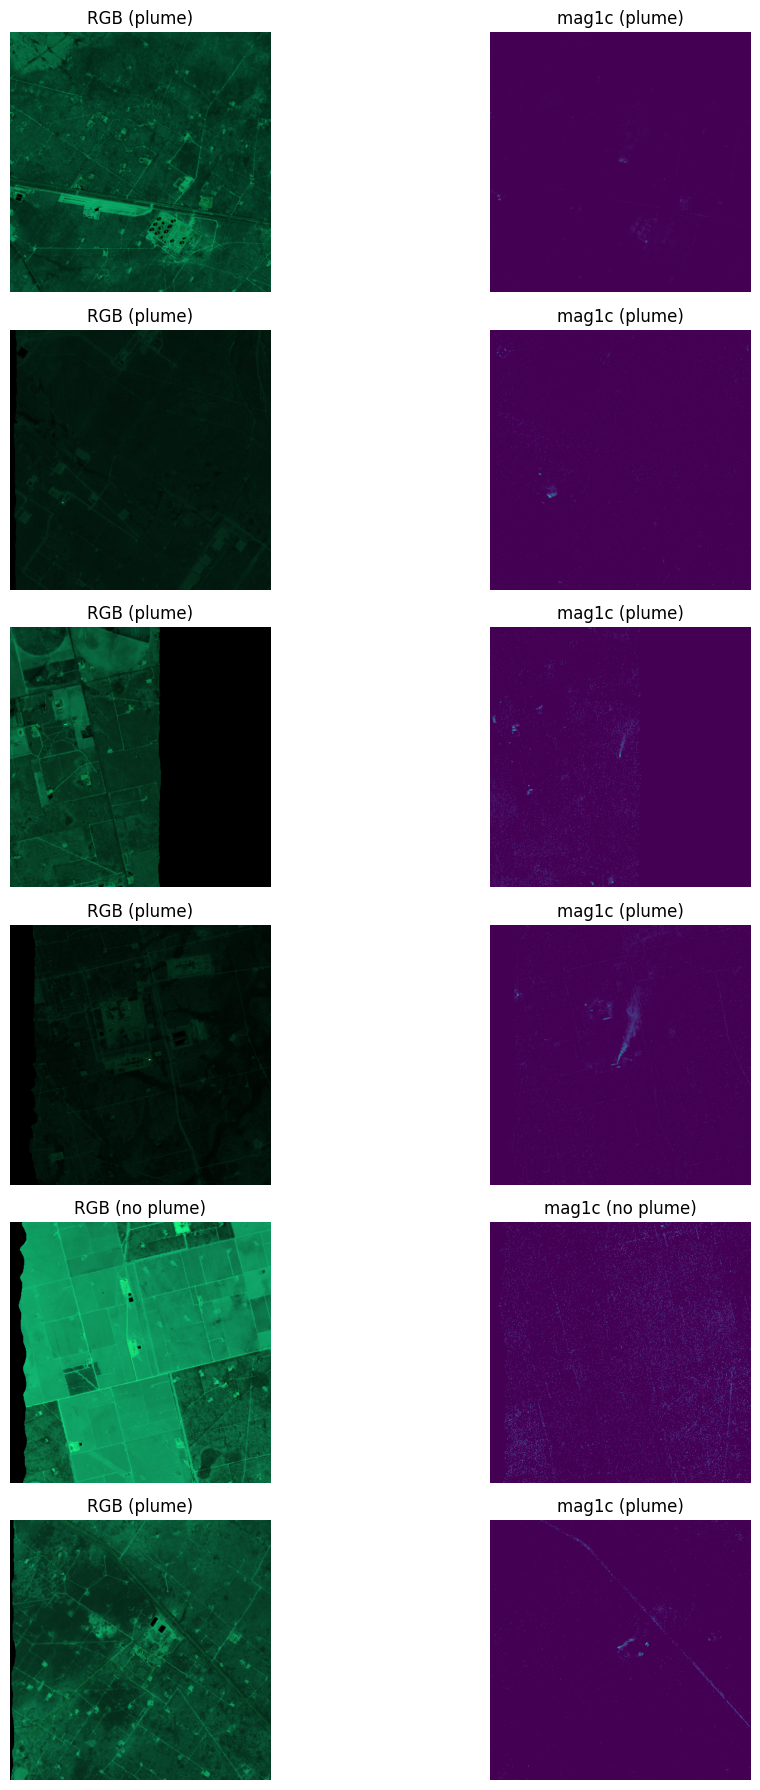

In [4]:
images = next(iter(dataloader))

# Create a figure with subplots
fig, ax = plt.subplots(6, 2, figsize=(12, 18))  # 6 row, 3 columns

# Display the first image
for i in range(images[0].shape[0]):
    image_rgb = images[0][i, :3, :, :].permute(1, 2, 0).numpy()
    image_mag1c = images[1][i].squeeze(0).numpy()
    
    image_rgb = image_rgb - image_rgb.min()  # Shift minimum to 0
    image_rgb = image_rgb / image_rgb.max()  # Scale maximum to 1
    
    plume = images[2][i].item()
    ax[i, 0].imshow(image_rgb)
    ax[i, 0].set_title(f"RGB ({"plume" if plume == True else "no plume"})")
    ax[i, 0].axis('off') 
    
    # Display the second image
    ax[i, 1].imshow(image_mag1c)  # Automatically handles RGB
    ax[i, 1].set_title(f"mag1c ({"plume" if plume == True else "no plume"})")
    ax[i, 1].axis('off')  # Turn off axis
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()

# Prepare input for model 

In [5]:
input_image = torch.cat((images[0], images[1]), dim=1)
input_image = input_image.to(device)

# Prepare model

In [6]:
file_name = r"trained_models\model_transformer_classifier_2024_11_30_10_34_58.pickle"

model_handler = ModelFilesHandler()
model, model_type, metrics, epoch = model_handler.load_model(file_name=file_name)

model.eval()
model.to(device)

C:\Users\mpilc\Desktop\Studia\Thesis\Repozytoria\Thesis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CustomDetrForClassification(
  (detr): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): FeatureListNet(
            (conv1): Conv2d(9, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            (bn1): DetrFrozenBatchNorm2d()
            (act1): ReLU(inplace=True)
            (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            (layer1): Sequential(
              (0): Bottleneck(
                (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn1): DetrFrozenBatchNorm2d()
                (act1): ReLU(inplace=True)
                (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn2): DetrFrozenBatchNorm2d()
                (drop_block): Identity()
                (act2): ReLU(inplace=True)
                (aa): Identity()
                (

# Show performance

In [7]:
outputs = model(input_image.to(device))
print(f"Labels:  {images[2].numpy()}")
print(f"Outputs: {torch.argmax(outputs, dim=1).bool().to("cpu").numpy()}")

Labels:  [ True  True  True  True False  True]
Outputs: [False False False False False False]


In [8]:
metrics

,TP,FP,FN,TN,Precision,Sensitivity,Specificity,NPV,FPR,Accuracy,F-Score,IoU,MCC,AUC,CI
0,0.164223,0.041056,0.322581,0.472141,0.799996,0.337349,0.919998,0.594095,0.08,0.636363,0.474574,0.311111,0.318464,0.628675,0.042933
